<a href="https://colab.research.google.com/github/Sergio2803/Primer_proyecto/blob/main/Redes_S9_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.model_selection


In [2]:
# dtype: float (float32), float16, float64 (double) ...
a = torch.tensor(1,dtype=torch.float)
b = torch.tensor([2,3],dtype=torch.float)
C = torch.tensor([[4,5],[6,7]]).float()
print(a)
print(b)
print(C)

tensor(1.)
tensor([2., 3.])
tensor([[4., 5.],
        [6., 7.]])


In [3]:
print(a * b)
print(a * C)
print(C @ b) # Matrix multiplication, in general sum_k A_ij....k B_kpq....r
print(C * C) # Element wise multiplication
print(C @ C) # Matrix multiplication

tensor([2., 3.])
tensor([[4., 5.],
        [6., 7.]])
tensor([23., 33.])
tensor([[16., 25.],
        [36., 49.]])
tensor([[46., 55.],
        [66., 79.]])


In [4]:
a = torch.tensor(2,dtype=torch.float,requires_grad=True)
b = torch.tensor(3).float().requires_grad_(True)
c = torch.tensor(4).float().requires_grad_(True)
d = a + b * c
d.backward()
print(a.grad,b.grad,c.grad)

tensor(1.) tensor(4.) tensor(3.)


In [5]:
A = torch.tensor([[1,2],[3,4]]).float().requires_grad_(True)
det_A = torch.det(A)
det_A.backward()
print(A)
print(det_A)
print(A.grad)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor(-2., grad_fn=<LinalgDetBackward0>)
tensor([[ 4., -3.],
        [-2.,  1.]])


In [6]:
inv_A = torch.linalg.inv(A)
# Calculemos la derivada del determinante de un matriz con respecto
# a los elementos de la matriz original
print(inv_A)
print(inv_A.T)
print(inv_A.T * det_A)

tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]], grad_fn=<LinalgInvExBackward0>)
tensor([[-2.0000,  1.5000],
        [ 1.0000, -0.5000]], grad_fn=<PermuteBackward0>)
tensor([[ 4., -3.],
        [-2.,  1.]], grad_fn=<MulBackward0>)


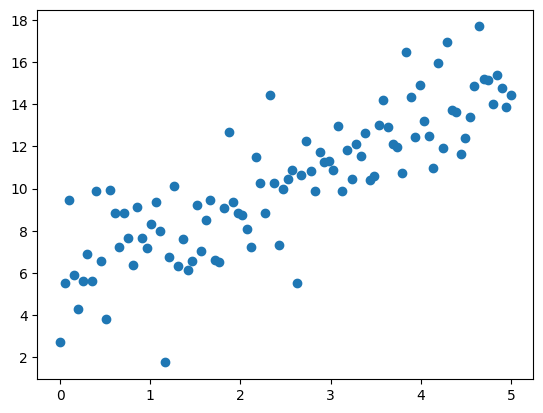

In [7]:
N = 100
x_data = torch.linspace(0,5,N).float()
y_data = 2 * x_data + 5 + 2*torch.randn(N)
plt.scatter(x_data,y_data)

In [8]:
# Definimos los parametros de nuestro modelo
w = torch.tensor(1).float().requires_grad_(True)
b = torch.tensor(1).float().requires_grad_(True)

# Learning rate
lr = 0.1

for epoch in range(100):
  # Hacemos una prediccion con los valores de los parametros actuales
  y_pred = w * x_data + b
  # Calculamos la perdida (loss function)
  loss = torch.mean((y_pred - y_data)**2)
  # Realizamos el backpropagation para la calcular la gradiente
  # del loss function con respecto a cada variable
  loss.backward()
  if epoch % 10 == 0:
    print(f"epoch: {epoch}, loss: {loss.item()}")
  # Actualizamos los parametros siguiendo la direccion
  # contraria del gradiente
  w.data = w.data - lr * w.grad
  b.data = b.data - lr * b.grad
  w.grad.zero_()
  b.grad.zero_()
print(w,b)

epoch: 0, loss: 50.616844177246094
epoch: 10, loss: 5.666622161865234
epoch: 20, loss: 3.743975877761841
epoch: 30, loss: 3.360941171646118
epoch: 40, loss: 3.2214789390563965
epoch: 50, loss: 3.1678545475006104
epoch: 60, loss: 3.147165536880493
epoch: 70, loss: 3.139181613922119
epoch: 80, loss: 3.1361007690429688
epoch: 90, loss: 3.1349117755889893
tensor(1.8889, requires_grad=True) tensor(5.5407, requires_grad=True)


In [9]:
# Definimos los parametros: w y b
linear_model = nn.Linear(1,1)
# Veamos los parámetros de nuestro modelo
for param in linear_model.parameters():
  print(param)

# Definimos nuestra funcion de perdida
crit = nn.MSELoss()

# Definimos nuestro optimizador
# en otras palabras, la forma en la que actualizaremos nuestros parámetros
# w.data = w.data - lr * w.grad
# b.data = b.data - lr * b.grad
optim = torch.optim.SGD(linear_model.parameters(),lr=0.1)

# Preparamos nuestros datos
x = x_data.reshape(-1,1)
y = y_data.reshape(-1,1)

for epoch in range(100):
  # Volvemos todas las gradientes zero para evitar acumulación de gradientes
  optim.zero_grad()
  # Hacemos una predicción con los valores actuales de los parámetros
  y_pred = linear_model(x)
  # Calculamos la perdida
  loss = crit(y_pred, y)
  if epoch % 10 == 0:
    print(f"epoch: {epoch}, loss: {loss.item()}")
  # Realizamos el backpropagation
  loss.backward()
  # Actualizamos los parametros
  optim.step()


Parameter containing:
tensor([[0.9116]], requires_grad=True)
Parameter containing:
tensor([-0.6377], requires_grad=True)
epoch: 0, loss: 79.5859375
epoch: 10, loss: 7.6088080406188965
epoch: 20, loss: 4.278520107269287
epoch: 30, loss: 3.562220573425293
epoch: 40, loss: 3.2990365028381348
epoch: 50, loss: 3.197781562805176
epoch: 60, loss: 3.1587142944335938
epoch: 70, loss: 3.1436383724212646
epoch: 80, loss: 3.1378204822540283
epoch: 90, loss: 3.135575294494629


In [10]:
mnist_train_ds = torchvision.datasets.MNIST("./",download=True,train=True,transform=torchvision.transforms.ToTensor())
mnist_test_ds = torchvision.datasets.MNIST("./",download=True,train=False,transform=torchvision.transforms.ToTensor())

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 34925774.02it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1722390.07it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 9734960.82it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 7066219.87it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [11]:
print("Total cantidad de datos en MNIST: ",len(mnist_train_ds))
x, y = next(iter(mnist_train_ds))
print(y)
print(x.shape)

Total cantidad de datos en MNIST:  60000
5
torch.Size([1, 28, 28])


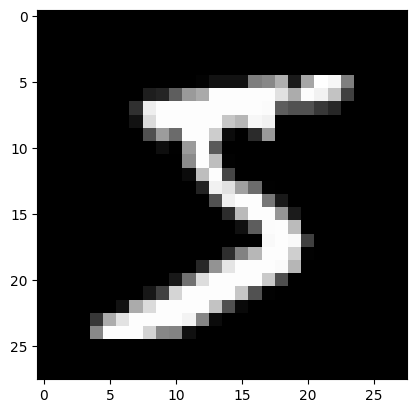

In [12]:
plt.imshow(x.reshape(28,28).numpy(),cmap="gray")

In [13]:
mnist_train_loader = torch.utils.data.DataLoader(mnist_train_ds,batch_size=128)
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_ds,batch_size=128)

In [14]:
for x, y in mnist_train_loader:
  print(x.shape, y.shape)
  break

torch.Size([128, 1, 28, 28]) torch.Size([128])


In [15]:
dev = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
x = torch.rand(3,3)
print(x)

tensor([[0.1855, 0.0254, 0.4075],
        [0.7354, 0.8755, 0.6720],
        [0.3842, 0.8018, 0.3035]])


In [16]:
# y = torch.rand(3,3,device=dev)
y = torch.rand(3,3).to(dev)
print(y)

tensor([[0.5801, 0.5894, 0.2430],
        [0.0818, 0.2816, 0.9638],
        [0.6657, 0.3253, 0.4092]])


In [17]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,10)
).to(dev)

In [19]:
crit = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=0.001)

In [20]:
def evaluate(model, loader, crit):
  model.eval()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in loader:
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()
    total += len(y)
  acc = 100* corrects / total
  avg_loss /= len(loader)
  return avg_loss, acc

def train_one_epoch(model, train_loader, crit, optim):
  model.train()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in train_loader:
    optim.zero_grad()
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    loss.backward()
    optim.step()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()
    total += len(y)
  acc = 100 * corrects / total
  avg_loss /= len(train_loader)
  return avg_loss, acc

def train(model, train_loader, test_loader, crit, optim, epochs = 20):
  for epoch in range(epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader,crit, optim)
    test_loss, test_acc = evaluate(model, test_loader, crit)
    print(f"epoch: {epoch}, train loss: {train_loss}, train acc: {train_acc}%, test loss: {test_loss}, test acc: {test_acc}%")

In [21]:
EPOCHS = 10
train(model,mnist_train_loader,mnist_test_loader,crit,optim,epochs=EPOCHS)

epoch: 0, train loss: 0.37658727490730376, train acc: 89.94166666666666%, test loss: 0.20511719504300552, test acc: 93.96%
epoch: 1, train loss: 0.17106655117735933, train acc: 95.02333333333333%, test loss: 0.13739557315512926, test acc: 95.92%
epoch: 2, train loss: 0.11910756687516533, train acc: 96.55666666666667%, test loss: 0.11099143887139103, test acc: 96.5%
epoch: 3, train loss: 0.08891677957123467, train acc: 97.43%, test loss: 0.09681789511873658, test acc: 96.93%
epoch: 4, train loss: 0.06904315622821292, train acc: 97.98166666666667%, test loss: 0.08835652385708652, test acc: 97.16%
epoch: 5, train loss: 0.054820377945598124, train acc: 98.46%, test loss: 0.08358387322875353, test acc: 97.41%
epoch: 6, train loss: 0.04397341222968945, train acc: 98.83666666666667%, test loss: 0.08217346065867798, test acc: 97.5%
epoch: 7, train loss: 0.03531719653555421, train acc: 99.09333333333333%, test loss: 0.08041836803795953, test acc: 97.48%
epoch: 8, train loss: 0.02834058796633471

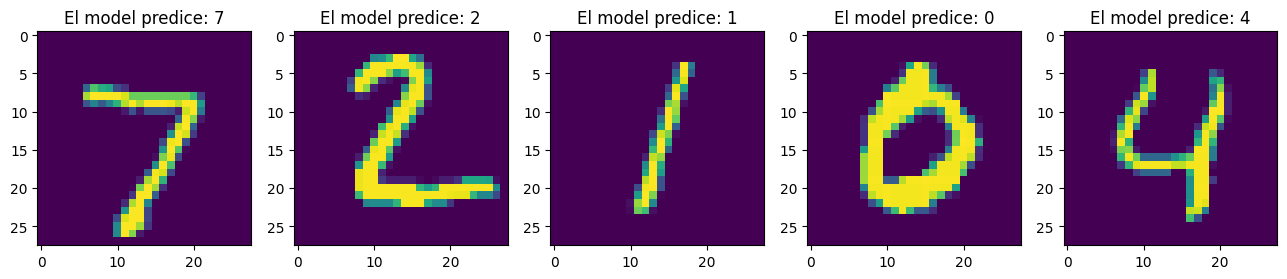

In [22]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i,(x, y) in enumerate(iter(mnist_test_ds)):
  if i == N:
    break
  x = x.reshape(1,1,28,28).to(dev)
  ypred = model(x)
  axs[i].imshow(x.cpu().reshape(28,28).numpy())
  axs[i].set_title(f"El model predice: {torch.argmax(ypred)}")

In [23]:
fashion_mnist_train_ds = torchvision.datasets.FashionMNIST("./",download=True,train=True,transform=torchvision.transforms.ToTensor())
fashion_mnist_test_ds = torchvision.datasets.FashionMNIST("./",download=True,train=False,transform=torchvision.transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 15635664.13it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 270845.06it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5030191.80it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16345402.72it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



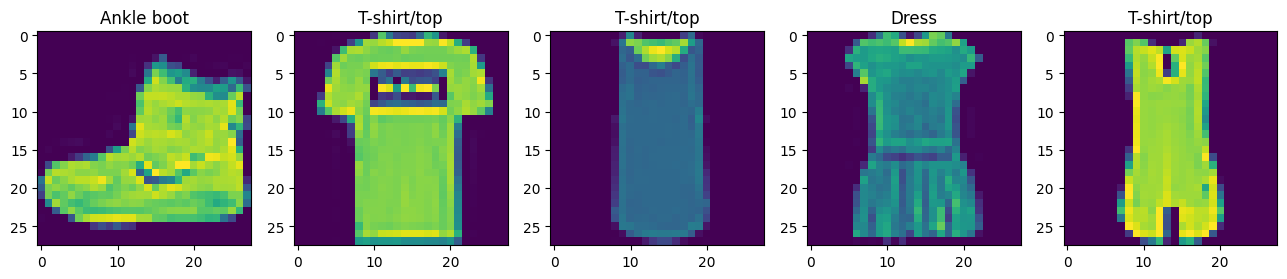

In [24]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i, (x,y) in enumerate(fashion_mnist_train_ds):
  if i == N:
    break
  axs[i].imshow(x.reshape(28,28).numpy())
  axs[i].set_title(labels[y])

In [25]:
fashion_mnist_train_dl = torch.utils.data.DataLoader(fashion_mnist_train_ds,batch_size=128)
fashion_mnist_test_dl = torch.utils.data.DataLoader(fashion_mnist_test_ds,batch_size=128)

In [26]:
fashion_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,10)
).to(dev)

In [27]:
crit = nn.CrossEntropyLoss()
optim = torch.optim.SGD(fashion_model.parameters(),lr=0.01)
train(fashion_model,fashion_mnist_train_dl,fashion_mnist_test_dl,crit,optim,epochs=10)

epoch: 0, train loss: 1.413007582428613, train acc: 60.766666666666666%, test loss: 0.9485571278801447, test acc: 67.55%
epoch: 1, train loss: 0.8202669380316093, train acc: 72.17%, test loss: 0.7546453770202927, test acc: 73.58%
epoch: 2, train loss: 0.6940262762468252, train acc: 76.535%, test loss: 0.6709682334072983, test acc: 76.8%
epoch: 3, train loss: 0.6272863529002997, train acc: 79.06666666666666%, test loss: 0.6202233867554725, test acc: 78.69%
epoch: 4, train loss: 0.5841601497328865, train acc: 80.48166666666667%, test loss: 0.5864710389058801, test acc: 79.81%
epoch: 5, train loss: 0.5541170799274688, train acc: 81.37833333333333%, test loss: 0.5625486604020565, test acc: 80.39%
epoch: 6, train loss: 0.5320398706490043, train acc: 82.05166666666666%, test loss: 0.5447716339479519, test acc: 81.11%
epoch: 7, train loss: 0.5150746891874749, train acc: 82.53833333333333%, test loss: 0.530908965234515, test acc: 81.63%
epoch: 8, train loss: 0.5014925830399812, train acc: 82.9

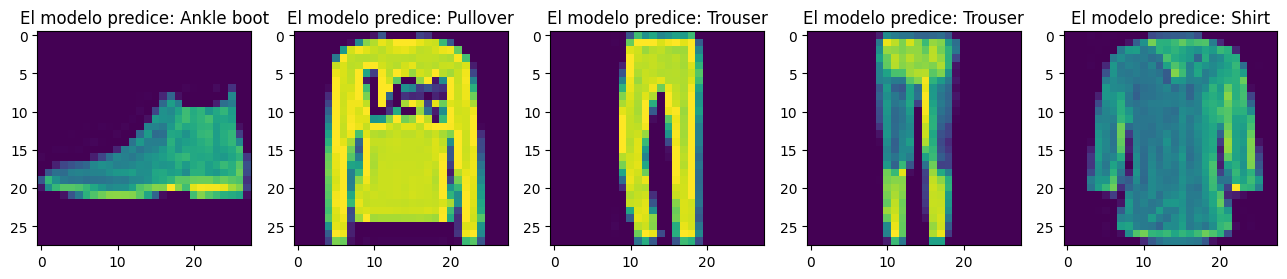

In [28]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i, (x, y) in enumerate(fashion_mnist_test_ds):
  if i == N:
    break
  x = x.reshape(1,1,28,28).to(dev)
  ypred = fashion_model(x)
  axs[i].imshow(x.cpu().reshape(28,28).numpy())
  axs[i].set_title(f"El modelo predice: {labels[torch.argmax(ypred)]}")

<ipython-input-29-630abe815c79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species_n'] = iris.species.map({'versicolor':1, 'virginica':2})


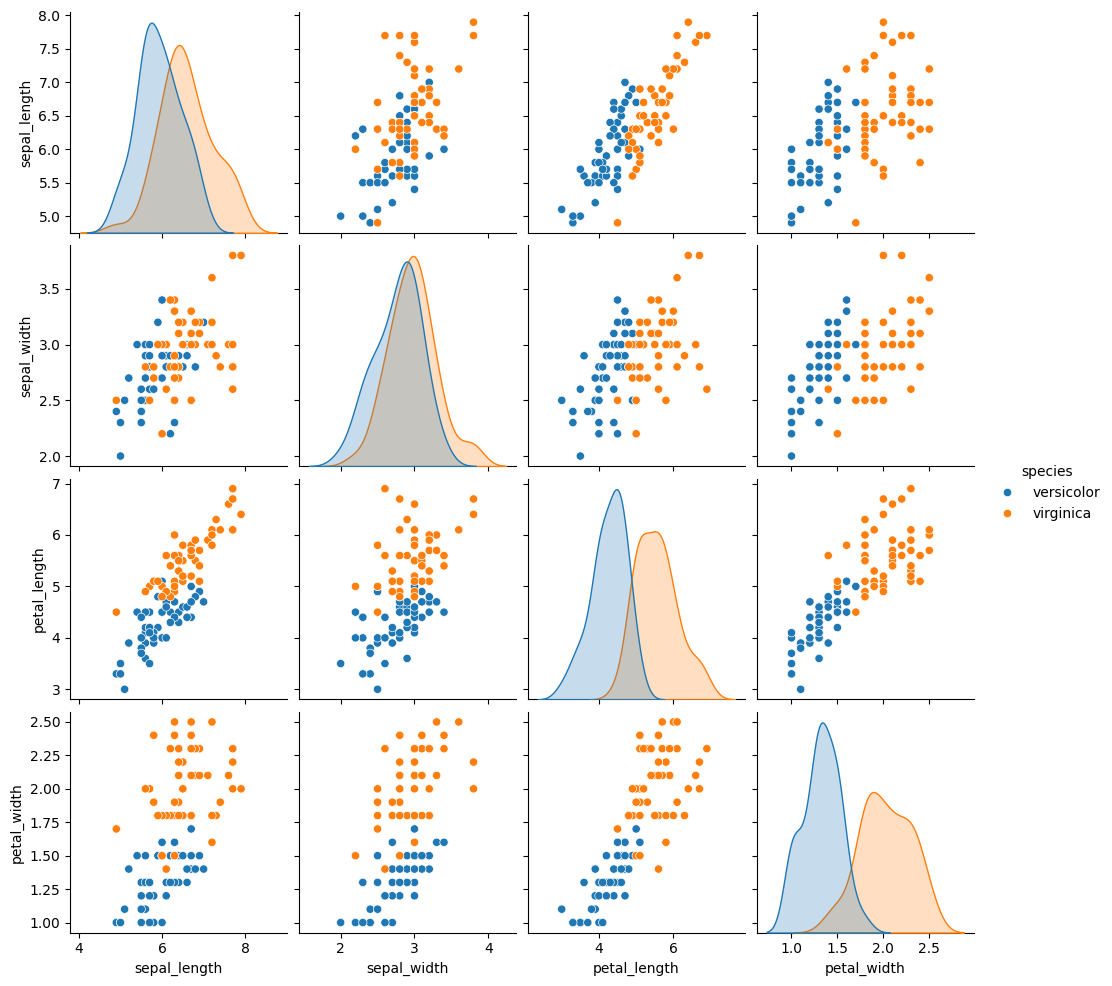

In [29]:
iris = sns.load_dataset("iris")
#g = sns.pairplot(iris, hue="species")
df = iris[iris.species != "setosa"]
g = sns.pairplot(df, hue="species")
df['species_n'] = iris.species.map({'versicolor':1, 'virginica':2})

# Y = 'largo_petalo', 'ancho_petalo'; X = 'largo_sepalo', 'ancho_sepalo')
X_iris = np.asarray(df.loc[:, ['sepal_length', 'sepal_width']], dtype=np.float32)
Y_iris = np.asarray(df.loc[:, ['petal_length', 'petal_width']], dtype=np.float32)
label_iris = np.asarray(df.species_n, dtype=int)

# Escala
from sklearn.preprocessing import StandardScaler
scalerx, scalery = StandardScaler(), StandardScaler()
X_iris = scalerx.fit_transform(X_iris)
Y_iris = StandardScaler().fit_transform(Y_iris)

# Dividir la data
X_iris_tr, X_iris_val, Y_iris_tr, Y_iris_val, label_iris_tr, label_iris_val = \
    sklearn.model_selection.train_test_split(X_iris, Y_iris, label_iris, train_size=0.5, stratify=label_iris)

0 11580.0703125 2694.4765625
10 185.49053955078125 520.6886596679688
20 70.08943176269531 345.4051513671875
30 46.225738525390625 300.1689758300781
40 39.693389892578125 282.588623046875


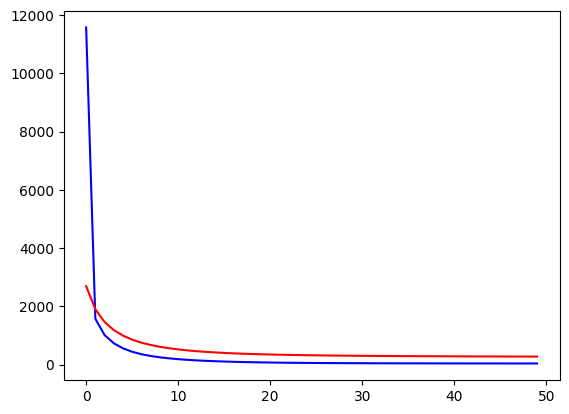

In [30]:
# X=X_iris_tr; Y=Y_iris_tr; X_val=X_iris_val; Y_val=Y_iris_val
# del X, Y, X_val, Y_val

def two_layer_regression_autograd_train(X, Y, X_val, Y_val, lr, nite):

    dtype = torch.float
    device = torch.device("cpu")

    # N tamaño del lote; D_in dimension de la entrada;
    # H dimension de capa oculpa; D_out dimension de la salida.
    N, D_in, H, D_out = X.shape[0], X.shape[1], 100, Y.shape[1]


    X = torch.from_numpy(X)
    Y = torch.from_numpy(Y)
    X_val = torch.from_numpy(X_val)
    Y_val = torch.from_numpy(Y_val)

    # Creamos tensores aleatorios para los pesos
    # La configuración require_grad=True indica que queremos calcular gradientes
    #con respecto a estos tensores durante el backward.
    W1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
    W2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

    losses_tr, losses_val = list(), list()

    learning_rate = lr
    for t in range(nite):
        # Paso forward: calcular la predicción de y utilizando operaciones
        #sobre Tensores; son exactamente las mismas operaciones que utilizamos
        #para calcular el forward utilizando Tensores, pero no necesitamos
        #mantener referencias a valores intermedios ya que no estamos implementando
        #el backward atrás a mano.
        y_pred = X.mm(W1).clamp(min=0).mm(W2)

        # Calcula e imprime la pérdida usando operaciones sobre Tensores.
        # Ahora la pérdida es un Tensor de forma (1,)
        # loss.item() obtiene el valor escalar que contiene la pérdida.
        loss = (y_pred - Y).pow(2).sum()

        # Usar autograd para calcular el pase backward. Esta llamada calculará el
        # gradiente de la pérdida con respecto a todos los Tensores con requires_grad=True.
        # Después de esta llamada w1.grad y w2.grad serán Tensores con el gradiente
        # de la pérdida con respecto a w1 y w2 respectivamente.
        loss.backward()

       # Actualizar manualmente los pesos utilizando el descenso de gradiente. Envolver en torch.no_grad()
       # porque los pesos tienen requires_grad=True, pero no necesitamos seguir esto
       # en autograd.
       # Una forma alternativa es operar sobre weight.data y weight.grad.data.
       # Recordemos que tensor.data da un tensor que comparte el almacenamiento con
       # tensor, pero no rastrea la historia.
       # También puede utilizar torch.optim.SGD para lograr esto.
        with torch.no_grad():
            W1 -= learning_rate * W1.grad
            W2 -= learning_rate * W2.grad

            # Poner a cero manualmente los gradientes después de actualizar los pesos
            W1.grad.zero_()
            W2.grad.zero_()

            y_pred = X_val.mm(W1).clamp(min=0).mm(W2)

           # Calcula e imprime la pérdida usando operaciones sobre Tensores.
          # Ahora la pérdida es un Tensor de forma (1,)
          # loss.item() obtiene el valor escalar que contiene la pérdida.
            loss_val = (y_pred - Y).pow(2).sum()

        if t % 10 == 0:
            print(t, loss.item(), loss_val.item())

        losses_tr.append(loss.item())
        losses_val.append(loss_val.item())

    return W1, W2, losses_tr, losses_val

W1, W2, losses_tr, losses_val = two_layer_regression_autograd_train(X=X_iris_tr, Y=Y_iris_tr, X_val=X_iris_val, Y_val=Y_iris_val,
                                                                 lr=1e-4, nite=50)
plt.plot(np.arange(len(losses_tr)), losses_tr, "-b", np.arange(len(losses_val)), losses_val, "-r")